In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(16,10)})
plt.style.use('seaborn-whitegrid')

In [86]:
year = '17'
model = 'model_old'

In [87]:
data = pd.read_csv(f'../outputs/{year}/tables/signal_table{year}.csv', index_col='name')
triggers = pd.read_csv(f'../outputs/{year}/tables/triggers{year}.csv', index_col='name')
reg_eff = pd.read_csv(f'../outputs/{model}/tables/signal_table{model}.csv', index_col='name')

In [88]:
data

,lum,dEmin,dEmax,Emean,Nsig,dNsig
name,,,,,,
641.0,3097.96,0.00,0.00,641.02,329.45,19.50
650.0,876.63,0.00,0.00,649.77,99.98,10.00
675.0,1225.14,0.00,0.00,674.85,85.59,10.04
700.0,876.66,0.00,0.00,700.56,39.54,6.91
725.0,1114.22,0.00,0.00,724.94,62.34,8.29
750.0,1107.58,0.00,0.00,749.55,97.12,10.48
775.0,970.86,0.00,0.00,774.85,106.98,10.34
800.0,1241.54,0.00,0.00,800.86,165.80,13.34
825.0,1381.86,0.00,0.00,825.05,191.62,14.29


Triggers

In [89]:
triggers.tail()

,TF,CF,TC,eTF,eCF,TrigEff,vTF,vCF,TrigErr
name,,,,,,,,,
939.6,4.0,1.0,12.0,0.87,0.72,0.96,0.08,0.10,0.03
940.2,3.0,3.0,11.0,0.75,0.75,0.94,0.11,0.11,0.04
940.8,4.0,3.0,14.0,0.79,0.75,0.95,0.09,0.09,0.03
960.0,11.0,4.0,32.0,0.87,0.73,0.96,0.05,0.07,0.02
990.0,14.0,0.0,40.0,0.98,0.73,0.99,0.02,0.06,0.01


In [90]:
reg_eff.head()

,lum,dEmin,dEmax,Emean,Nsig,dNsig
name,,,,,,
550.0,7163,0.0,0.0,550.0,1815.55,45.10
562.5,6306,0.0,0.0,562.5,1557.16,41.22
575.0,5516,0.0,0.0,575.0,1360.09,40.02
587.5,5116,0.0,0.0,587.5,1250.34,36.69
600.0,4606,0.0,0.0,600.0,1085.48,34.69


Get N/L

In [91]:
data['CSvis'] = data['Nsig']/data['lum']
data['dCSvis'] = data['dNsig']/data['lum']

In [92]:
data.shape

(23, 8)

Trigger join

In [93]:
data = data.join(triggers[['TrigEff', 'TrigErr']], how='left')

In [94]:
data.shape #сверить с предыдущим shape

(23, 10)

In [95]:
data = data.drop(['Nsig', 'dNsig', 'lum'], axis=1)

Get Reg_eff

In [96]:
reg_eff['RegEff'] = reg_eff['Nsig']/reg_eff['lum']
reg_eff['RegErr'] = reg_eff['dNsig']/reg_eff['lum']
reg_eff.drop(['dEmax', 'dEmin', 'lum', 'Nsig', 'dNsig'], axis=1, inplace=True)

<ErrorbarContainer object of 3 artists>

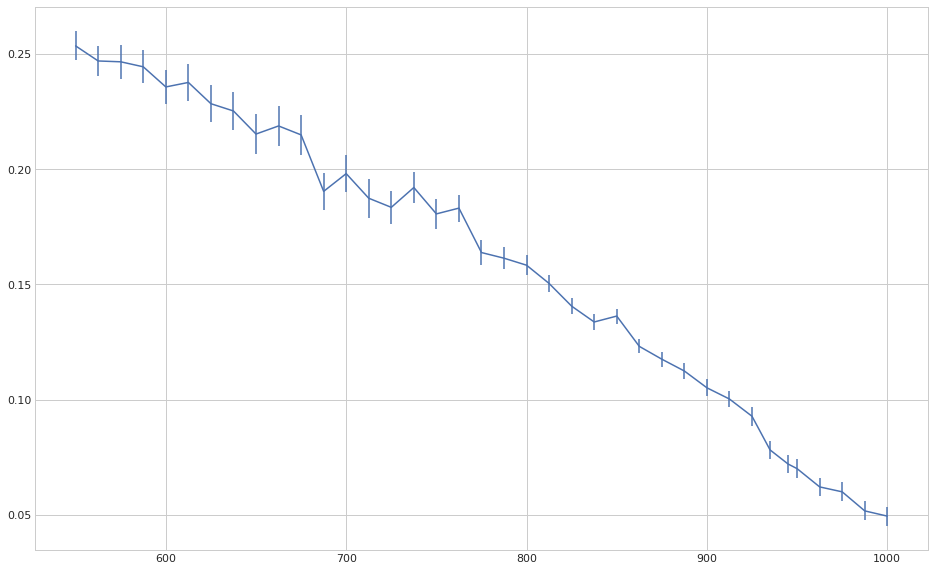

In [122]:
plt.errorbar(data=reg_eff, x='Emean', y='RegEff', yerr='RegErr')

Reg eff join

In [130]:
data['RegEff'] = data.apply(lambda x: np.interp(x['Emean'], reg_eff.Emean, reg_eff.RegEff), axis=1)
data['RegErr'] = data.apply(lambda x: np.interp(x['Emean'], reg_eff.Emean, reg_eff.RegErr), axis=1)

Recalc cross section

In [131]:
data['CS'] = data['CSvis']/data['TrigEff']/data['RegEff'];
data['dCS'] = data['CS']*np.sqrt( np.square( data['dCSvis']/data['CSvis'] ) + 
                                np.square( data['TrigErr']/data['TrigEff'] ) + 
                                np.square( data['RegErr']/data['RegEff'] ))

In [99]:
#data.drop(['CSvis', 'dCSvis', 'TrigEff', 'TrigErr', 'RegEff', 'RegErr'], axis=1, inplace=True)

In [100]:
data.to_csv(f'../outputs/{year}/tables/result_visible.csv', float_format='%.5f')

## Draw cross sections

In [101]:
cs11 = pd.read_csv('../outputs/11/result_new.csv', index_col=['Unnamed: 0'])
cs12 = pd.read_csv('../outputs/12/result_new.csv', index_col=['Unnamed: 0'])
cs17 = pd.read_csv('../outputs/17/tables/result_visible.csv', index_col=['name'])
cs19 = pd.read_csv('../outputs/19/tables/result_visible.csv', index_col=['name'])

In [102]:
#radcor = pd.read_csv('rad_cors.dat', delimiter='\t', names=['energy', 'radcor'], index_col=['energy'])
radcor = pd.read_csv('../outputs/radcors.dat', names=['energy', 'radcor'], index_col=['energy'])
radcor.index *= 0.5e3
radcor = radcor.sort_index()

In [103]:
cs11.tail()

,dEmin,dEmax,Emean,CS,dCS
850.0,0.00,0.00,846.43,0.372212,0.087794
862.5,0.00,0.00,861.56,0.280130,0.092108
880.0,8.15,7.89,878.97,0.132405,0.042213
910.0,14.83,13.04,911.28,0.152008,0.044248
950.0,28.82,37.90,964.41,0.057911,0.024015


In [104]:
radcor.head()

,radcor
energy,
550.0,0.771060
562.5,0.778335
575.0,0.784576
587.5,0.790510
600.0,0.796090


In [116]:
cs11['rad'] = np.interp(cs11.Emean, radcor.index, radcor.radcor)
cs12['rad'] = np.interp(cs12.Emean, radcor.index, radcor.radcor)
cs17['rad'] = np.interp(cs17.Emean, radcor.index, radcor.radcor)
cs19['rad'] = np.interp(cs19.Emean, radcor.index, radcor.radcor)

In [117]:
def born(data):
    data['born'] = data.CS/data.rad
    data['born_err'] = data.dCS/data.rad

In [118]:
born(cs11)
born(cs12)
born(cs17)
born(cs19)

In [119]:
errE = dict()
errE[11] = [cs11.dEmin*2e-3, cs11.dEmax*2e-3]
errE[12] = [cs12.dEmin*2e-3, cs12.dEmax*2e-3]
errE[17] = [cs17.dEmin*2e-3, cs17.dEmax*2e-3]
errE[19] = [cs19.dEmin*2e-3, cs19.dEmax*2e-3]

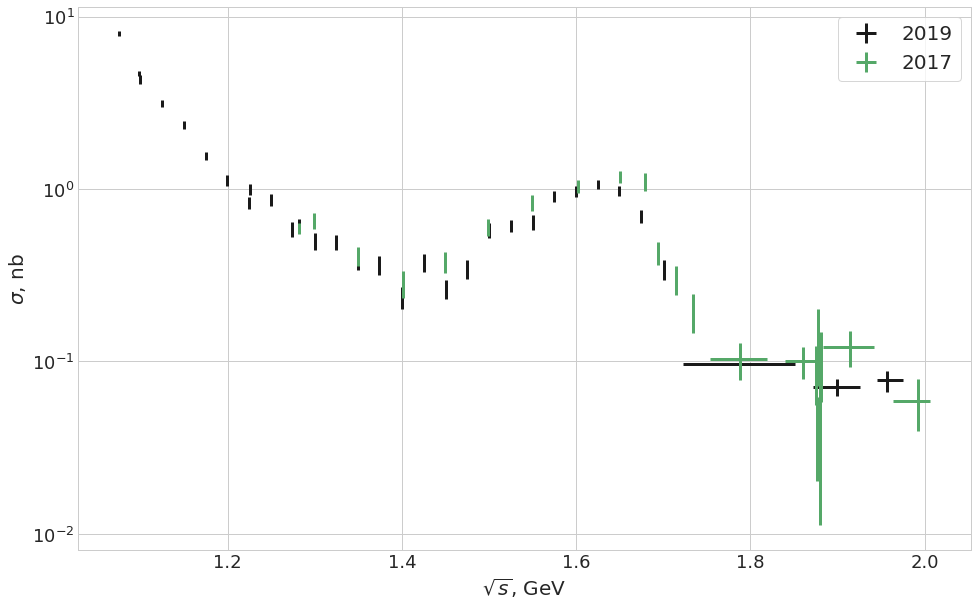

In [132]:
plt.errorbar(cs19.Emean*2e-3, cs19.born, yerr=cs19.born_err, xerr=errE[19], fmt='kd', elinewidth=3, ms=0, label='2019')
plt.errorbar(cs17.Emean*2e-3, cs17.born, yerr=cs17.born_err, xerr=errE[17], fmt='g^', elinewidth=3, ms=0, label='2017')
# plt.errorbar(cs12.Emean*2e-3, cs12.born, yerr=cs12.born_err, xerr=errE[12], fmt='bp', elinewidth=3, ms=5, label='2012')
# plt.errorbar(cs11.Emean*2e-3, cs11.born, yerr=cs11.born_err, xerr=errE[11], fmt='rv', elinewidth=3, ms=5, label='2011')
plt.yscale('log')
plt.xlabel('$\sqrt{s}$, GeV', fontsize=20)
plt.ylabel('$\sigma$, nb', fontsize=20)
ax = plt.gca()
ax.tick_params(labelsize=18)
ax.legend(fontsize=20, frameon=True)
#plt.savefig('cs.pdf')